<a href="https://colab.research.google.com/github/heli3199/Artificial-Intelligence/blob/main/Assignment_04_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ECE 57000 Assignment 4 Exercise

Your Name: Heliben Parikh


## Exercise 0: Train your model on GPU (0 points)

For some tasks in this assignment, it can take a long time if you run it on CPU. For example, based on our test on Exercise 3 Task 4, it will take roughly 2 hours to train the full model for 1 epoch on CPU. Hence, we highly recommend you try to train your model on GPU.

To do so, first you need to enable GPU on Colab (this will restart the runtime). Click `Runtime`-> `Change runtime type` and select the `Hardware accelerator` there.  You can then run the following code to see if the GPU is correctly initialized and available.



In [ ]:
import torch
print(f'Can I can use GPU now? -- {torch.cuda.is_available()}')

Can I can use GPU now? -- True


### You must manually move your model and data to the GPU (and sometimes back to the cpu)
After setting the GPU up on colab, then you should put your **model** and **data** to GPU. We give a simple example below. You can use `to` function for this task. See [torch.Tensor.to](https://pytorch.org/docs/stable/generated/torch.Tensor.to.html) to move a tensor to the GPU (probably your mini-batch of data in each iteration) or [torch.nn.Module.to](https://pytorch.org/docs/stable/generated/torch.nn.Module.html#torch.nn.Module.to) to move your NN model to GPU (assuming you create subclass [torch.nn.Module](https://pytorch.org/docs/stable/generated/torch.nn.Module.html)). Note that `to()` of tensor returns a NEW tensor while `to` of a NN model will apply this in-place. To be safe, the best semantics are `obj = obj.to(device)`. For printing, you will need to move a tensor back to the CPU via the `cpu()` function.

Once the model and input data are on the GPU, everything else can be done the same.  This is the beauty of PyTorch GPU acceleration.  None of the other code needs to be altered.

To summarize, you need to 1) enable GPU acceleration in Colab, 2) put the model on the GPU, and 3) put the input data (i.e., the batch of samples) onto the GPU using `to()` after it is loaded by the data loaders (usually you only put one batch of data on the GPU at a time).

In [ ]:
import torch.nn as nn
rand_tensor = torch.rand(5,2)
simple_model = nn.Sequential(nn.Linear(2,10), nn.ReLU(), nn.Linear(10,1))
print(f'input is on {rand_tensor.device}')
print(f'model parameters are on {[param.device for param in simple_model.parameters()]}')
print(f'output is on {simple_model(rand_tensor).device}')

device = torch.device('cuda')
# ----------- <Your code> ---------------
# Move rand_tensor and model onto the GPU device
rand_tensor = rand_tensor.to(device)
simple_model = simple_model.to(device)

# --------- <End your code> -------------
print(f'input is on {rand_tensor.device}')
print(f'model parameters are on {[param.device for param in simple_model.parameters()]}')
print(f'output is on {simple_model(rand_tensor).device}')

input is on cpu
model parameters are on [device(type='cpu'), device(type='cpu'), device(type='cpu'), device(type='cpu')]
output is on cpu
input is on cuda:0
model parameters are on [device(type='cuda', index=0), device(type='cuda', index=0), device(type='cuda', index=0), device(type='cuda', index=0)]
output is on cuda:0


## Exercise 1: Why use a CNN rather than only fully connected layers? (30 points)

In this exercise, you will build two models for the **MNIST** dataset: one uses only fully connected layers and another uses a standard CNN layout (convolution layers everywhere except the last layer is fully connected layer). The two models should be built with roughly the same accuracy performance, your task is to compare the number of network parameters (a huge number of parameters can affect training/testing time, memory requirements, overfitting, etc.).

### Task 1: Following the structure used in the instructions, you should create

*   One network named **OurFC** which should consist with only fully connected layers

  *   You should decide how many layers and how many hidden dimensions you want in your network 
  *   Your final accuracy on the test dataset should lie roughly around 90% ($\pm$2%)
  *   There is no need to make the neural network unnecessarily complex, your total training time should no longer than 3 mins

*   Another network named **OurCNN** which applys a standard CNN structure
  *   Again, you should decide how many layers and how many channels you want for each layer.
  *   Your final accuracy on the test dataset should lie roughly around 90% ($\pm$2%)
  *   A standard CNN structure can be composed as **[Conv2d, MaxPooling, ReLU] x num_conv_layers + FC x num_fc_layers**

* Train and test your network on MNIST data as in the instructions
* You are **required** to print out the loss in the training and loss+accuracy in the test as in the instructions.

In [ ]:
import torchvision

transform = torchvision.transforms.Compose([torchvision.transforms.ToTensor(),
                      torchvision.transforms.Normalize((0.1307,),(0.3081,))])

train_dataset = torchvision.datasets.MNIST('/data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.MNIST('/data', train=False, download=True, transform=transform)

print(train_dataset)

batch_size_train, batch_size_test = 64, 1000

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size_train, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size_test, shuffle=False)

print(train_loader)


batch_idx, (images, targets) = next(enumerate(train_loader))
print(f'current batch index is {batch_idx}')
print(f'images has shape {images.size()}')
print(f'targets has shape {targets.size()}')

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting /data/MNIST/raw/train-images-idx3-ubyte.gz to /data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting /data/MNIST/raw/train-labels-idx1-ubyte.gz to /data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting /data/MNIST/raw/t10k-images-idx3-ubyte.gz to /data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting /data/MNIST/raw/t10k-labels-idx1-ubyte.gz to /data/MNIST/raw

Dataset MNIST
    Number of datapoints: 60000
    Root location: /data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.1307,), std=(0.3081,))
           )
current batch index is 0
images has shape torch.Size([64, 1, 28, 28])
targets has shape torch.Size([64])


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
input_size = 784
output_size = 10
hidden_size = 200

class OurFC(nn.Module):
  def __init__(self):
    super(OurFC, self).__init__()
    self.fcl1 = nn.Linear(input_size, hidden_size)
    self.relu = nn.ReLU()
    self.fcl2 = nn.Linear(hidden_size, output_size)
        
  def forward(self, x):
    x = x.flatten(1)
    x = self.fcl1(x)
    x = self.relu(x)
    x = self.fcl2(x)
    return F.log_softmax(x,-1)

import torch.optim as optim

classifier = OurFC()
optimizer = optim.SGD(classifier.parameters(), lr=0.01, momentum=0.8)

def train(classifier, epoch):

  classifier.train() # we need to set the mode for our model

  for batch_idx, (images, targets) in enumerate(train_loader):

    optimizer.zero_grad()
    output = classifier(images)
    loss = F.nll_loss(output, targets) # Here is a typical loss function (negative log likelihood)
    loss.backward()
    optimizer.step()

    if batch_idx % 10 == 0: # We record our output every 10 batches
      train_losses.append(loss.item()) # item() is to get the value of the tensor directly
      train_counter.append(
        (batch_idx*64) + ((epoch-1)*len(train_loader.dataset)))
    if batch_idx % 100 == 0: # We visulize our output every 10 batches
      print(f'Epoch {epoch}: [{batch_idx*len(images)}/{len(train_loader.dataset)}] Loss: {loss.item()}')


def test(classifier, epoch):

  classifier.eval() # we need to set the mode for our model

  test_loss = 0
  correct = 0

  with torch.no_grad():
    for images, targets in test_loader:
      output = classifier(images)
      test_loss += F.nll_loss(output, targets, reduction='sum').item()
      pred = output.data.max(1, keepdim=True)[1] # we get the estimate of our result by look at the largest class value
      correct += pred.eq(targets.data.view_as(pred)).sum() # sum up the corrected samples
  
  test_loss /= len(test_loader.dataset)
  test_losses.append(test_loss)
  test_counter.append(len(train_loader.dataset)*epoch)

  print(f'Test result on epoch {epoch}: Avg loss is {test_loss}, Accuracy: {100.*correct/len(test_loader.dataset)}%')


In [ ]:
train_losses = []
train_counter = []
test_losses = []
test_counter = []
max_epoch = 3

for epoch in range(1, max_epoch+1):
  train(classifier, epoch)
  test(classifier, epoch)

Epoch 1: [0/60000] Loss: 2.4052977561950684
Epoch 1: [6400/60000] Loss: 0.4981573522090912
Epoch 1: [12800/60000] Loss: 0.49709102511405945
Epoch 1: [19200/60000] Loss: 0.4421815574169159
Epoch 1: [25600/60000] Loss: 0.22142526507377625
Epoch 1: [32000/60000] Loss: 0.3935529887676239
Epoch 1: [38400/60000] Loss: 0.29307207465171814
Epoch 1: [44800/60000] Loss: 0.4797735810279846
Epoch 1: [51200/60000] Loss: 0.23962914943695068
Epoch 1: [57600/60000] Loss: 0.19953154027462006
Test result on epoch 1: Avg loss is 0.18354516983032226, Accuracy: 94.68000030517578%
Epoch 2: [0/60000] Loss: 0.32579079270362854
Epoch 2: [6400/60000] Loss: 0.1454439014196396
Epoch 2: [12800/60000] Loss: 0.08930901437997818
Epoch 2: [19200/60000] Loss: 0.10694098472595215
Epoch 2: [25600/60000] Loss: 0.20777586102485657
Epoch 2: [32000/60000] Loss: 0.12439475208520889
Epoch 2: [38400/60000] Loss: 0.11231294274330139
Epoch 2: [44800/60000] Loss: 0.13741882145404816
Epoch 2: [51200/60000] Loss: 0.18516352772712708

In [ ]:
# ----------- <Your code> ---------------
import torch.nn as nn
import torch.nn.functional as F

class OurCNN(nn.Module): 

  def __init__(self):
    super(OurCNN, self).__init__()

    self.conv = nn.Conv2d(1, 3, kernel_size=5)
    self.fc = nn.Linear(432, 10)

  def forward(self, x):
    x = self.conv(x)        # x now has shape (batchsize x 3 x 24 x 24)
    x = F.relu(F.max_pool2d(x,2))  # x now has shape (batchsize x 3 x 12 x 12)
    x = x.view(-1, 432)      # x now has shape (batchsize x 432)
    x = F.relu(self.fc(x))     # x has shape (batchsize x 10)
    return F.log_softmax(x,-1) 


import torch.optim as optim

classifier1 = OurCNN()
optimizer = optim.SGD(classifier1.parameters(), lr=0.01, momentum=0.8)

def train(classifier1, epoch):

  classifier1.train() # we need to set the mode for our model

  for batch_idx, (images, targets) in enumerate(train_loader):

    optimizer.zero_grad()
    output = classifier1(images)
    loss = F.nll_loss(output, targets) # Here is a typical loss function (negative log likelihood)
    loss.backward()
    optimizer.step()

    if batch_idx % 10 == 0: # We record our output every 10 batches
      train_losses.append(loss.item()) # item() is to get the value of the tensor directly
      train_counter.append(
        (batch_idx*64) + ((epoch-1)*len(train_loader.dataset)))
    if batch_idx % 100 == 0: # We visulize our output every 10 batches
      print(f'Epoch {epoch}: [{batch_idx*len(images)}/{len(train_loader.dataset)}] Loss: {loss.item()}')


def test(classifier1, epoch):

  classifier1.eval() # we need to set the mode for our model

  test_loss = 0
  correct = 0

  with torch.no_grad():
    for images, targets in test_loader:
      output = classifier1(images)
      test_loss += F.nll_loss(output, targets, reduction='sum').item()
      pred = output.data.max(1, keepdim=True)[1] # we get the estimate of our result by look at the largest class value
      correct += pred.eq(targets.data.view_as(pred)).sum() # sum up the corrected samples
  
  test_loss /= len(test_loader.dataset)
  test_losses.append(test_loss)
  test_counter.append(len(train_loader.dataset)*epoch)

  print(f'Test result on epoch {epoch}: Avg loss is {test_loss}, Accuracy: {100.*correct/len(test_loader.dataset)}%')

In [ ]:
train_losses = []
train_counter = []
test_losses = []
test_counter = []
max_epoch = 3

for epoch in range(1, max_epoch+1):
  train(classifier1, epoch)
  test(classifier1, epoch)

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


Epoch 1: [0/60000] Loss: 2.3382444381713867
Epoch 1: [6400/60000] Loss: 0.4897024929523468
Epoch 1: [12800/60000] Loss: 0.2412685751914978
Epoch 1: [19200/60000] Loss: 0.7151153683662415
Epoch 1: [25600/60000] Loss: 0.36420533061027527
Epoch 1: [32000/60000] Loss: 0.35586273670196533
Epoch 1: [38400/60000] Loss: 0.3296612501144409
Epoch 1: [44800/60000] Loss: 0.6933466196060181
Epoch 1: [51200/60000] Loss: 0.09937207400798798
Epoch 1: [57600/60000] Loss: 0.3135760724544525
Test result on epoch 1: Avg loss is 0.12268757934570312, Accuracy: 96.05999755859375%
Epoch 2: [0/60000] Loss: 0.18522247672080994
Epoch 2: [6400/60000] Loss: 0.22796569764614105
Epoch 2: [12800/60000] Loss: 0.1281757354736328
Epoch 2: [19200/60000] Loss: 0.11357274651527405
Epoch 2: [25600/60000] Loss: 0.10439292341470718
Epoch 2: [32000/60000] Loss: 0.04065630957484245
Epoch 2: [38400/60000] Loss: 0.32689014077186584
Epoch 2: [44800/60000] Loss: 0.0844619944691658
Epoch 2: [51200/60000] Loss: 0.0902884379029274
Epo

### Task 2: Compare the number of parameters that are used in both your neural networks by printing out the total number of parameters for both of your networks.

**Note:** You need to clearly show which number corresponds to which network.

In [ ]:
# ----------- <Your code> ---------------
print("OurFC parameters:", end =" ")
FCtotal_params = sum(p.numel() for p in classifier.parameters())
print(FCtotal_params)
#for name, p in classifier.named_parameters():
#  print(name, ',', p.size(), type(p))

print("OurCNN parameters:", end =" ")
CNNtotal_params = sum(p.numel() for p in classifier1.parameters())
print(CNNtotal_params)
#for name, p in classifier1.named_parameters():
#  print(name, ',', p.size(), type(p))

OurFC parameters: 159010
OurCNN parameters: 4408


Questions (0 points, just for understanding): Which one has more parameters?  Which one is likely to have less computational cost when deployed? Which one took longer to train?

## Exercise 2: Train classifier on CIFAR-10 data. (30 points)
Now, lets move our dataset to color images. CIFAR-10 dataset is another widely used dataset. Here all images have colors, i.e each image has 3 color channels instead of only one channel in MNIST. You need to pay more attention to the dimension of the data as it passes through the layers of your network.

### Task 1: Create data loaders and plot images
Set up a `train_loader` and `test_loader` for the CIFAR-10 data, and plot a figure:

*   3 x 3 subplot
*   each subplot is a randomly chosen image from the test dataset
*   label each image with its label

The corresponding names of the classes is given as 
`classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')`

Note: In your transforms, the normalizing constant is given as `transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])`

Files already downloaded and verified
Files already downloaded and verified


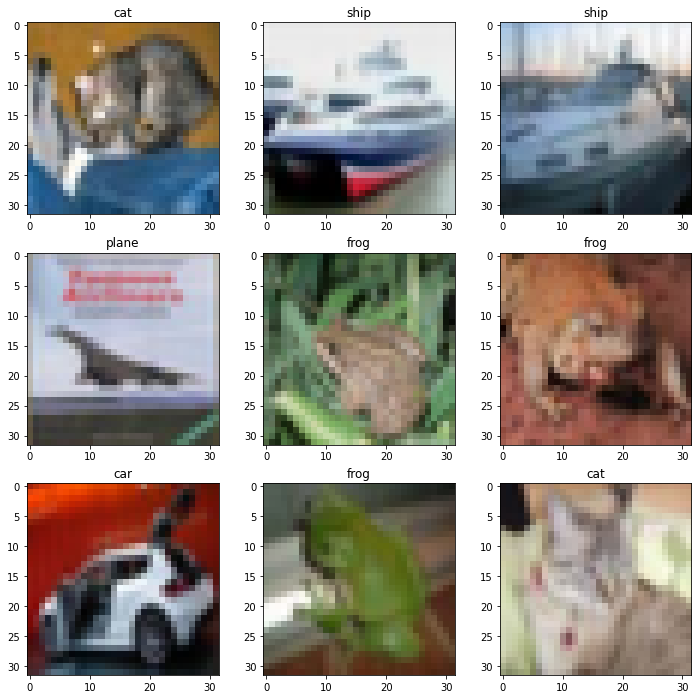

In [ ]:
# ----------- <Your code> ---------------

import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 9

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

dataiter = iter(testloader)  # random images from test dataset
images, labels = dataiter.next()

fig, ax = plt.subplots(3,3)
fig.set_size_inches(12,12)
for i in range(3):
  for j in range(3):
    img = images[i*3+j]/ 2+0.5
    img = img.numpy()
    img = img.swapaxes(0,1).swapaxes(1,2)
    ax[i,j].imshow(img)
    ax[i,j].set_title(f'{classes[labels[i*3+j]]}')
fig.show()

### Task 2: Create CNN and train it
Set up a convolutional neural network and have your data trained on it. You have to decide all the details in your network, overall your neural network should meet the following standards:


*   You should not use more than three convolutional layers and three fully connected layers
*   Accuracy on the test dataset should be **above** 50%



In [ ]:
# ----------- <Your code> ---------------
#
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) 
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()


import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

for epoch in range(3):  

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 2000 == 1999:    
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.195
[1,  4000] loss: 1.799
[2,  2000] loss: 1.504
[2,  4000] loss: 1.424
[3,  2000] loss: 1.295
[3,  4000] loss: 1.274
Finished Training


In [ ]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

In [ ]:
correct = 0
total = 0

with torch.no_grad():
    for data in testloader:
        images, labels = data
        
        outputs = net(images)
        
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 56 %


### Task 3: Plot misclassified test images
Plot some misclassified images in your test dataset:

*   select three images that are **misclassified** by your neural network
*   label each images with true label and predicted label



Actual Label: ship
Predicted Label: car


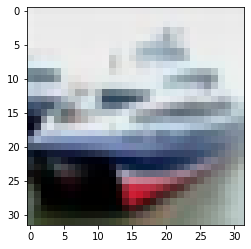

Actual Label: ship
Predicted Label: car


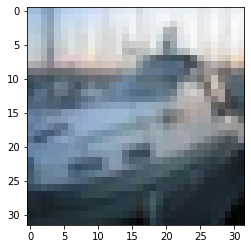

Actual Label: plane
Predicted Label: car


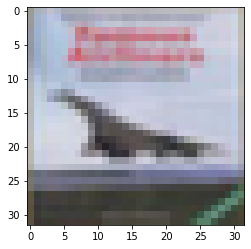

In [ ]:
# ----------- <Your code> ---------------
dataiter = iter(testloader)
images, labels = dataiter.next()

#imshow(torchvision.utils.make_grid(images))
#print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(3)))

net = Net()
net.load_state_dict(torch.load(PATH))

outputs = net(images)
_, predicted = torch.max(outputs, 1)

#print('Predicted: ', ' '.join('%5s' % classes[predicted[j]] for j in range(3)))
count =0
for i in range(20):
  if (count==3):
    break
  if (labels[i]!=predicted[i]):
    count = count +1
    print("Actual Label:", end =" ")
    print(classes[labels[i]])
    print("Predicted Label:", end =" ")
    print(classes[predicted[i]])
    imshow(torchvision.utils.make_grid(images[i]))
   

Questions (0 points): Are the mis-classified images also misleading to human eyes?

## Exercise 3: Transfer Learning (30 points)

In practice, people won't train an entire CNN from scratch, because it is relatively rare to have a dataset of sufficient size (or sufficient computational power). Instead, it is common to pretrain a CNN on a very large dataset and then use the CNN either as an initialization or a fixed feature extractor for the task of interest.

In this task, you will learn how to use a pretrained CNN for CIFAR-10 classification.

### Task1: Load pretrained model

`torchvision.models` (https://pytorch.org/vision/stable/models.html) contains definitions of models for addressing different tasks, including: image classification, pixelwise semantic segmentation, object detection, instance segmentation, person keypoint detection and video classification.

First, you should load the **pretrained** ResNet-18 that has already been trained on [ImageNet](https://www.image-net.org/) using `torchvision.models`. If you are interested in more details about Resnet-18, read this paper https://arxiv.org/pdf/1512.03385.pdf.

In [ ]:
# ----------- <Your code> ---------------
import torchvision.models as models
model = models.resnet18(pretrained=True)

### Task2: Create data loaders for CIFAR-10

Then you need to create a dataloader of CIFAR-10. Note that the model you load has been trained on **ImageNet** and it expects inputs as mini-batches of 3-channel RGB images of shape (3 x H x W), where H and W are expected to be **at least** 224. So you need to preprocess the CIFAR-10 data to make sure it has a height and width. See [`torchvision.transforms.Resize`](https://pytorch.org/vision/stable/transforms.html#torchvision.transforms.Resize).
You will probably want to add this transform appropriately to the `transform` you created in a previous task.


In [ ]:
# ----------- <Your code> ---------------
import torch
from torchvision import datasets, transforms as T
from torchvision.datasets import CIFAR10
from torch.utils.data import Dataset, DataLoader
import numpy as np

batch_size = 40
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])

transform = T.Compose([T.Resize(256), T.CenterCrop(224), T.ToTensor()])

train_dataset = torchvision.datasets.CIFAR10(
    root= './data', train = True,
    download =True, transform = transform)
test_dataset = torchvision.datasets.CIFAR10(
    root= './data', train = False,
    download =True, transform = transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size = batch_size, shuffle = True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size = batch_size, shuffle = True)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


### Task3: Classify test data on pretrained model

Use the model you load to classify the **test** CIFAR-10 data and print out the test accuracy.

Don't be surprised if the accuracy is bad!

In [ ]:
model = model.to(device)
with torch.no_grad():
    number_corrects = 0
    number_samples = 0
    for i, (test_images_set , test_labels_set) in enumerate(test_loader):
        test_images_set = test_images_set.to(device)
        test_labels_set = test_labels_set.to(device)
    
        y_predicted = model(test_images_set)
        labels_predicted = y_predicted.argmax(axis = 1)
        number_corrects += (labels_predicted==test_labels_set).sum().item()
        number_samples += test_labels_set.size(0)
    print(f'Overall accuracy {(number_corrects / number_samples)*100}%')

Overall accuracy 0.08%


### Task 4: Update model for CIFAR-10

Now try to improve the test accuracy. We offer several possible solutions:

(1) You can try to directly continue to train the model you load with the CIFAR-10 training data. 

(2) For efficiency, you can try to freeze part of the parameters of the loaded models. For example, you can first freeze all parameters by

```
for param in model.parameters():
    param.requires_grad = False
```
and then unfreeze the last few layers by setting `somelayer.requires_grad=True`.

You are also welcome to try any other approach you can think of.


**Note:** You should print out the test accuracy and to get full credits, the test accuracy should be at least **80%**.

In [ ]:
import torch.optim as optim

model = model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.001, momentum=0.9,weight_decay=5e-4)

num_epochs = 2
n_total_step = len(train_loader)
#print(n_total_step)

for epoch in range(num_epochs):
  for i, (imgs , labels) in enumerate(train_loader):
    imgs = imgs.to(device)
    labels = labels.to(device)
    labels_hat = model(imgs)
    n_corrects = (labels_hat.argmax(axis=1)==labels).sum().item()
    loss_value = criterion(labels_hat, labels)
    loss_value.backward()
    optimizer.step()
    optimizer.zero_grad()
    if (i+1) % 250 == 0:
      print(f' epoch {epoch+1}/{num_epochs}, step: {i+1}/{n_total_step}: loss = {loss_value:.5f}, acc = {100*(n_corrects/labels.size(0)):.2f}% ')
  print()

with torch.no_grad():
    number_corrects = 0
    number_samples = 0
    for i, (test_images_set , test_labels_set) in enumerate(test_loader):
        test_images_set = test_images_set.to(device)
        test_labels_set = test_labels_set.to(device)
    
        y_predicted = model(test_images_set)
        labels_predicted = y_predicted.argmax(axis = 1)
        number_corrects += (labels_predicted==test_labels_set).sum().item()
        number_samples += test_labels_set.size(0)
    print(f'Overall accuracy {(number_corrects / number_samples)*100}%')

 epoch 1/2, step: 250/1250: loss = 1.20435, acc = 67.50% 
 epoch 1/2, step: 500/1250: loss = 0.37338, acc = 85.00% 
 epoch 1/2, step: 750/1250: loss = 0.83333, acc = 77.50% 
 epoch 1/2, step: 1000/1250: loss = 0.23179, acc = 92.50% 
 epoch 1/2, step: 1250/1250: loss = 0.32121, acc = 90.00% 

 epoch 2/2, step: 250/1250: loss = 0.23652, acc = 95.00% 
 epoch 2/2, step: 500/1250: loss = 0.24009, acc = 92.50% 
 epoch 2/2, step: 750/1250: loss = 0.07259, acc = 97.50% 
 epoch 2/2, step: 1000/1250: loss = 0.12100, acc = 95.00% 
 epoch 2/2, step: 1250/1250: loss = 0.24296, acc = 90.00% 

Overall accuracy 91.11%


In [ ]:
# ----------- <Your code> --------------
#for name, para in model.named_parameters():
#  if para.requires_grad:print(name)
for param in model.parameters():
    param.requires_grad = False
#print(param)
params = model.state_dict()
#params.keys()

In [ ]:
model.fc.weight.requires_grad=True
model.fc.bias.requires_grad =True
model.bn1.weight.requires_grad=True
model.bn1.bias.requires_grad=True

In [ ]:
import torch.optim as optim

model = model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.001, momentum=0.9,weight_decay=5e-4)

num_epochs = 2
n_total_step = len(train_loader)
#print(n_total_step)

for epoch in range(num_epochs):
  for i, (imgs , labels) in enumerate(train_loader):
    imgs = imgs.to(device)
    labels = labels.to(device)
    labels_hat = model(imgs)
    n_corrects = (labels_hat.argmax(axis=1)==labels).sum().item()
    loss_value = criterion(labels_hat, labels)
    loss_value.backward()
    optimizer.step()
    optimizer.zero_grad()
    if (i+1) % 250 == 0:
      print(f' epoch {epoch+1}/{num_epochs}, step: {i+1}/{n_total_step}: loss = {loss_value:.5f}, acc = {100*(n_corrects/labels.size(0)):.2f}% ')
  print()

with torch.no_grad():
    number_corrects = 0
    number_samples = 0
    for i, (test_images_set , test_labels_set) in enumerate(test_loader):
        test_images_set = test_images_set.to(device)
        test_labels_set = test_labels_set.to(device)
    
        y_predicted = model(test_images_set)
        labels_predicted = y_predicted.argmax(axis = 1)
        number_corrects += (labels_predicted==test_labels_set).sum().item()
        number_samples += test_labels_set.size(0)
    print(f'Overall accuracy {(number_corrects / number_samples)*100}%')

 epoch 1/2, step: 250/1250: loss = 0.12722, acc = 97.50% 
 epoch 1/2, step: 500/1250: loss = 0.11250, acc = 97.50% 
 epoch 1/2, step: 750/1250: loss = 0.20932, acc = 95.00% 
 epoch 1/2, step: 1000/1250: loss = 0.04709, acc = 100.00% 
 epoch 1/2, step: 1250/1250: loss = 0.02419, acc = 100.00% 

 epoch 2/2, step: 250/1250: loss = 0.09363, acc = 97.50% 
 epoch 2/2, step: 500/1250: loss = 0.05511, acc = 100.00% 
 epoch 2/2, step: 750/1250: loss = 0.02146, acc = 100.00% 
 epoch 2/2, step: 1000/1250: loss = 0.04992, acc = 97.50% 
 epoch 2/2, step: 1250/1250: loss = 0.21850, acc = 92.50% 

Overall accuracy 91.72%


Freezing few parameters further increase my effciency from normal training.